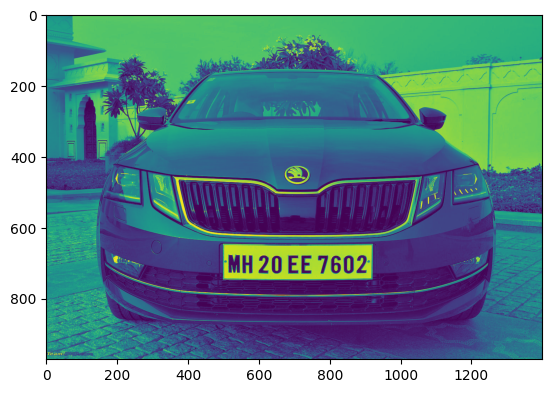

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 1 Поиск общего объекта

img = cv.imread('./car2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден"

img2 = img.copy()
template = cv.imread('./car_template2.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "Файл не найден"

w, h = template.shape[::-1]  # ширина и высота шаблона
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

plt.imshow(img)

In [15]:
# Перебор всех методов

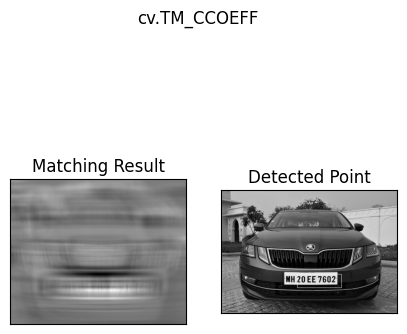

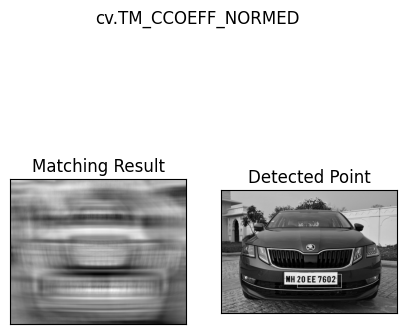

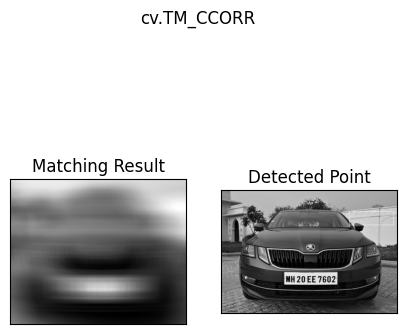

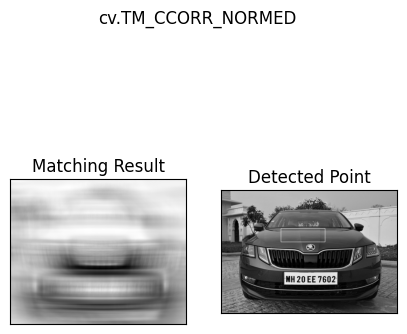

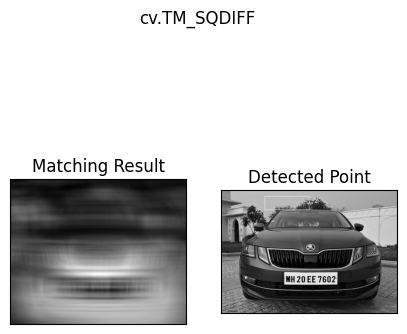

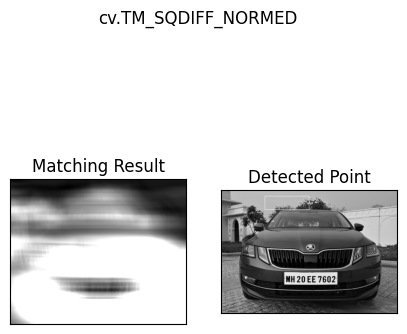

In [18]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # cv.matchTemplate: вычисляет степень совпадения между шаблоном и изображением
    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Для некоторых методов минимум — лучшее совпадение (SQDIFF),
    # для других максимум — лучшее совпадение (CCORR, CCOEFF)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Рисуем прямоугольник вокруг найденного совпадения
    cv.rectangle(img, top_left, bottom_right, 255, 2)

    # --- Отображаем результат ---
    plt.figure(figsize=(5,5))
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(meth)
    plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x27303de2210>)

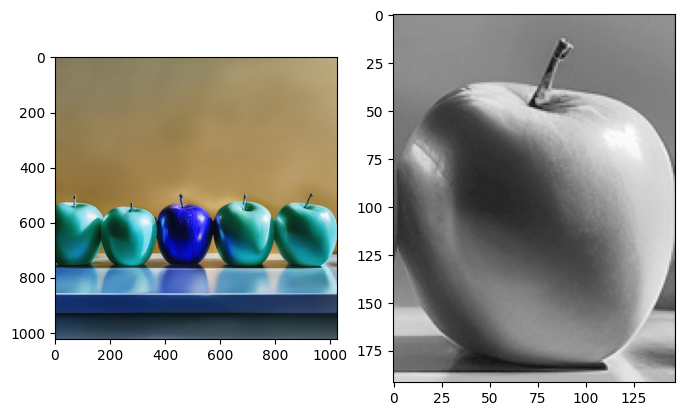

In [77]:
img_rgb = cv.imread('./apple.png')
assert template is not None, "Файл не найден"

img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

template = cv.imread('./template_apple.png', 0)
assert template is not None, "Файл не найден"

plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(img_rgb, cmap='gray')
plt.subplot(122), plt.imshow(template, cmap='gray')



(<Axes: >, <matplotlib.image.AxesImage at 0x2730a99d590>)

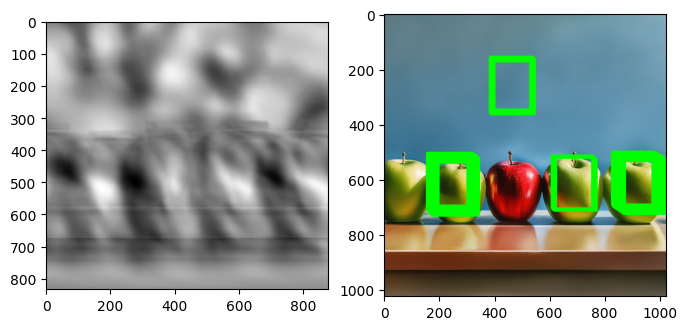

In [79]:
w, h = template.shape[::-1]

# Выполняем сопоставление с использованием TM_CCOEFF_NORMED 
res = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF_NORMED)

# Устанавливаем порог совпадения
threshold = 0.565
loc = np.where(res >= threshold)

# Рисуем прямоугольники вокруг всех найденных совпадений
for pt in zip(*loc[::-1]):  # Переворачиваем координаты (x, y)
    cv.rectangle(img_rgb, pt, (pt[0]*1 + w, pt[1]*1 + h), (0, 255, 0), 2)


plt.figure(figsize=(8,5))
plt.subplot(121), plt.imshow(res, cmap='gray')
plt.subplot(122), plt.imshow(cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB))